# Tarea 3 - Machine Learning

***Inteligencia Artificial***

***II Semestre 2024***

***Tecnológico de Costa Rica***

## Fase de entendimiento del negocio
### Determinar los objetivos del negocio
#### Objetivos del negocio
- Lograr clasificar correctamente el nivel de pobreza de hogares según una serie de variables seleccionadas.
- Determinar cuál de los conjuntos de variables seleccionadas es el mejor para la clasificación del nivel de pobreza de hogares.
#### Criterios de éxito (en términos del negocio)
- Con el entrenamiento de un modelo se logran acertar los datos niveles de pobreza en los datos de prueba.
- Se logra determinar el conjunto de variables que arrojen un resultado más aproximado al objetivo.

## Fase de entendimiento de los datos
### Recopilación inicial de datos
#### Lista de fuentes de datos requeridos
- https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data?select=train.csv

#### Método de acceso
- Sitio web de Kaggle con el título: `Costa Rican Household Poverty Level Prediction`.

In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


#### Descripción de los datos

Dentro de los datos a utilizar se encuentran `9557 registros` y `143 variables` en total, que representan la cantidad de hogares almacenadas en los datos y utilizadas para la obtención de los resultados.

In [100]:
data = pd.read_csv("./data/train.csv")
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


### Exploración de los datos

Los conjuntos de variables que se utilizarán para la construcción de los modelos son los siguientes:
- Directo:
    * ***v2a1***: Pago mensual de la renta (relacionado con la capacidad económica del hogar).
    * ***meaneduc***: Promedio de años de educación para adultos en el hogar.
    * ***dependency***: Tasa de dependencia (relación entre la población económicamente activa y la dependiente en el hogar).
- Indirecto:
    * ***rooms***: Cantidad de habitaciones en la casa.
    * ***r4h1***: Hombres menores a 12 años.
    * ***r4h2***: Hombres de 12 años de edad y mayores.
    * ***r4h3***: Cantidad de hombres en la casa.
    * ***r4m1***: Mujeres menores a 12 años.
    * ***r4m2***: Mujeres de 12 años de edad y mayores.
    * ***r4m3***: Cantidad de mujeres en la casa.

En la columna `Target` se puede encontrar el nivel de pobreza en el que se clasifica cada hogar, tiene 4 niveles:
- ***1*** = pobreza extrema
- ***2*** = pobreza moderada
- ***3*** = hogar vulnerable
- ***4*** = hogar no vulnerable

In [81]:
INCOME_COLUMN_NAME = "v2a1"
MEAN_EDUCATION_COLUMN_NAME = "meaneduc"
DEPENDENCY_COLUMN_NAME = "dependency"

indirect_columns = ["rooms", "r4h1", "r4h2", "r4h3", "r4m1", "r4m2", "r4m3"]

TARGET_COLUMN_NAME = "Target"

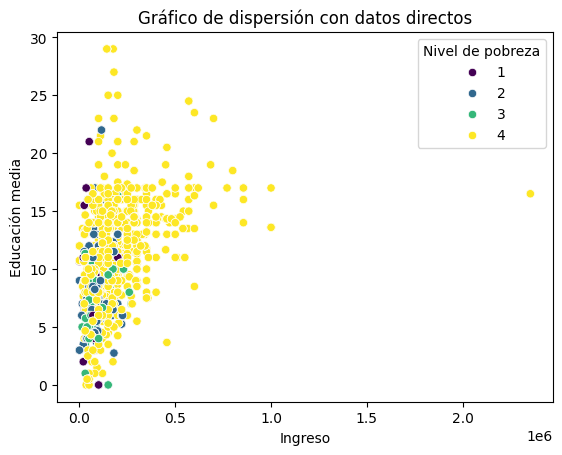

In [62]:
sns.scatterplot(x=INCOME_COLUMN_NAME, y=MEAN_EDUCATION_COLUMN_NAME, hue=TARGET_COLUMN_NAME, palette="viridis", data=data)
plt.xlabel("Ingreso")
plt.ylabel("Educación media")
plt.title("Gráfico de dispersión con datos directos")
plt.legend(title="Nivel de pobreza")
plt.show()

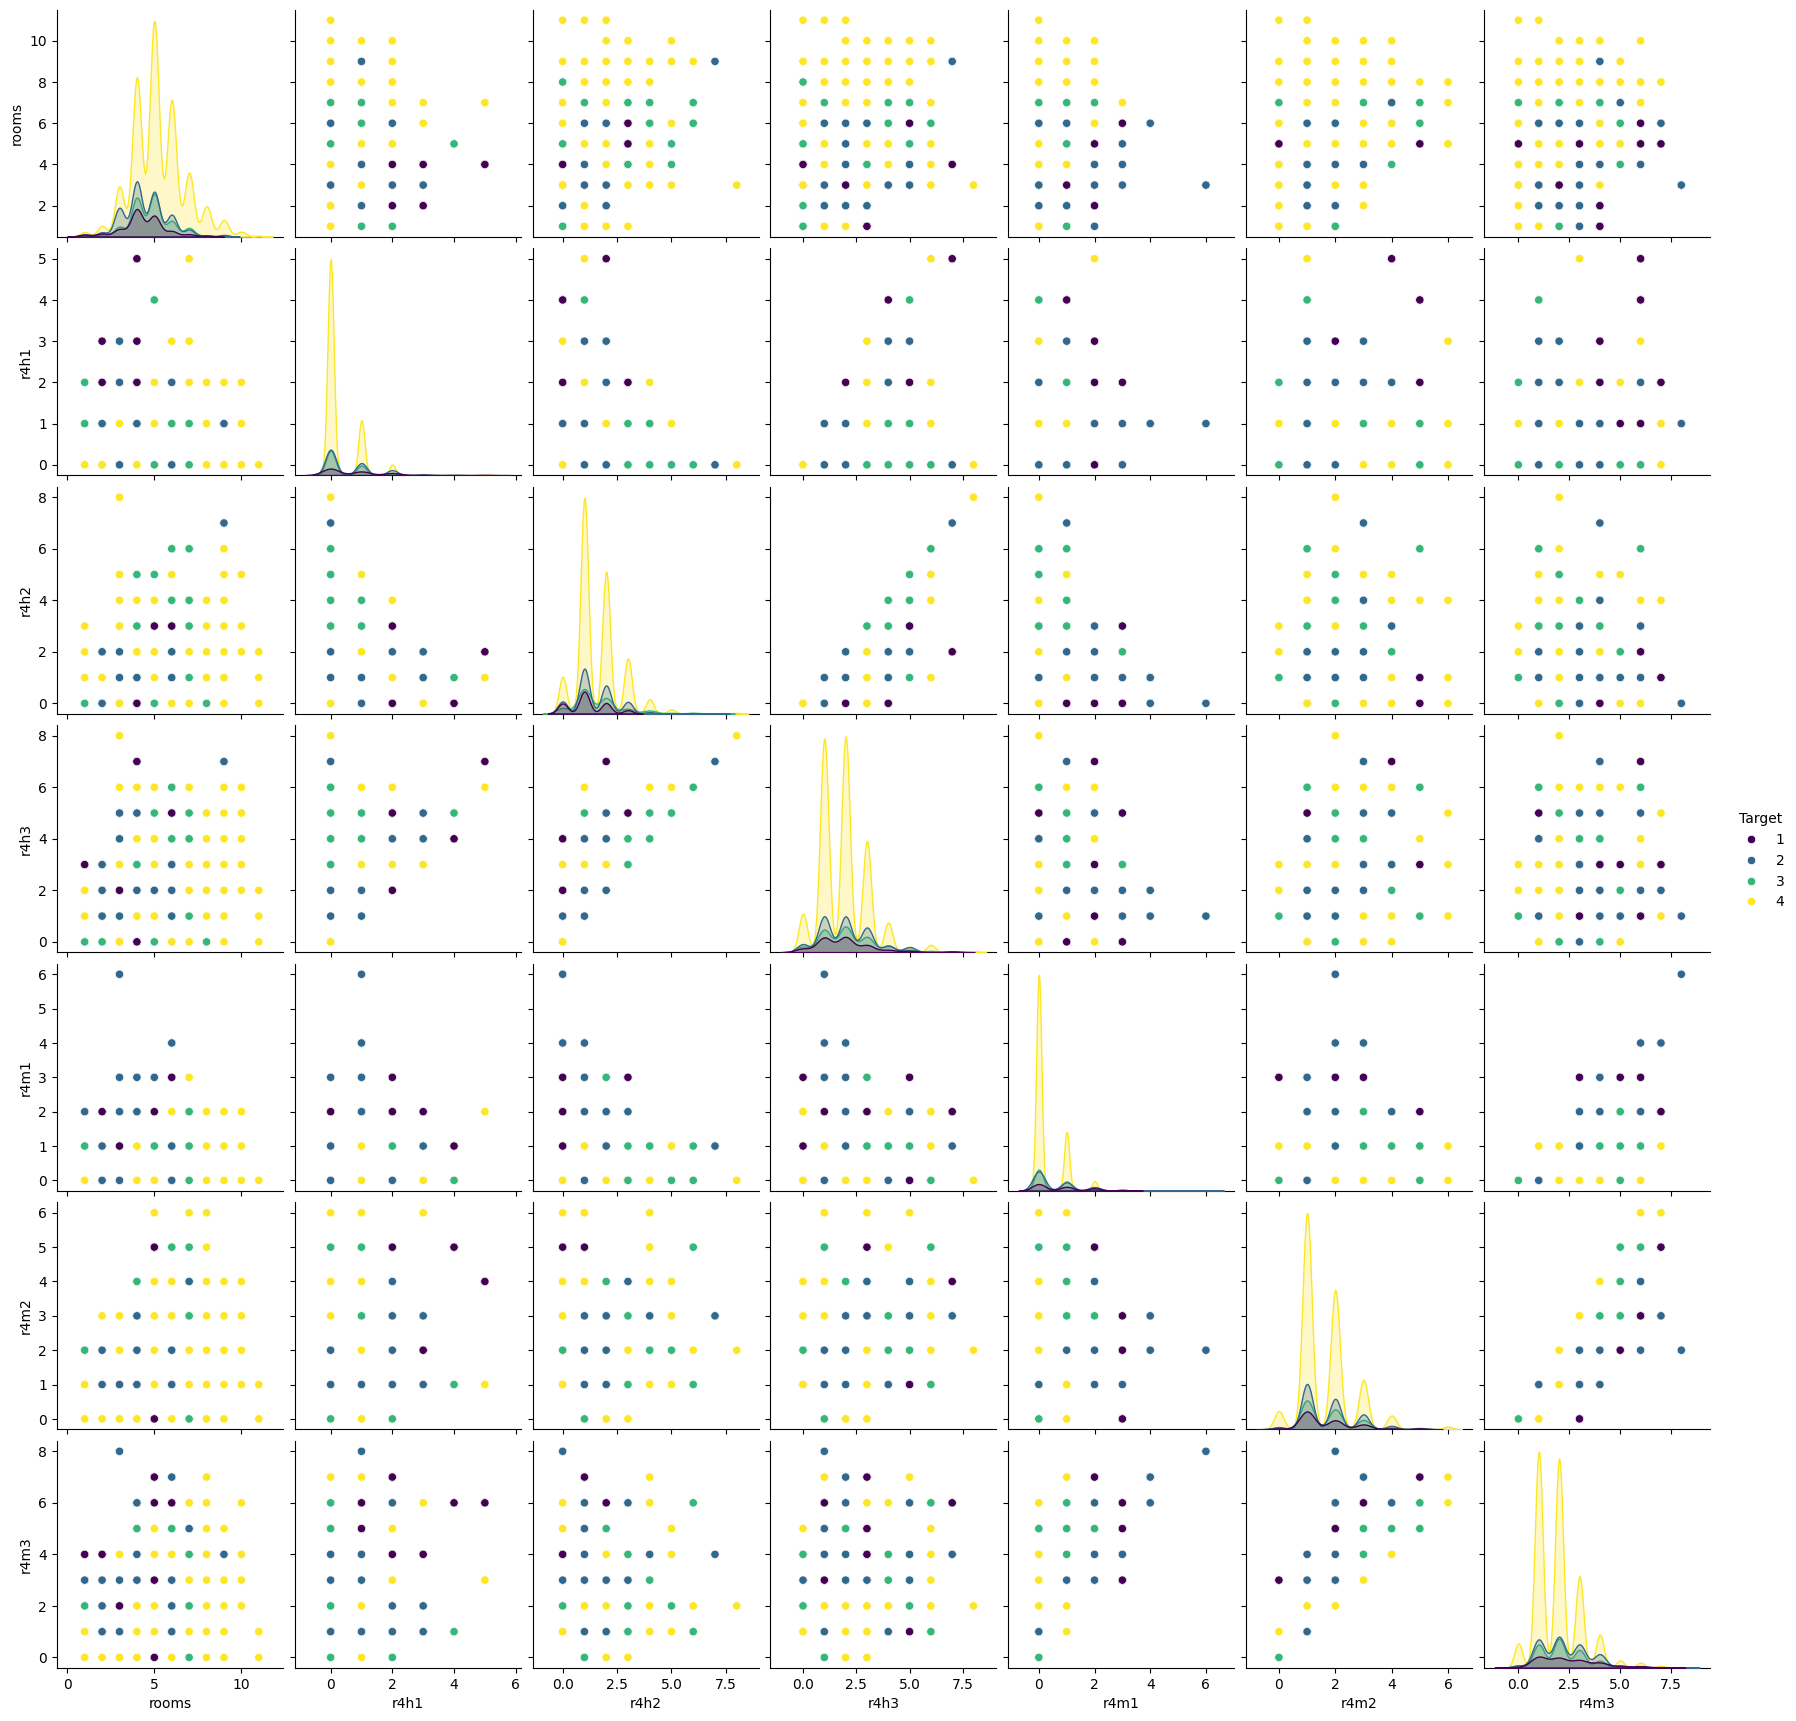

In [63]:
sns.pairplot(data[indirect_columns + [TARGET_COLUMN_NAME]], hue=TARGET_COLUMN_NAME, palette="viridis")
plt.show()


### Calidad de los datos
Se comprobará que los valores a evaluar dentro de las columnas sean numéricos y que cumplan con ciertas características para poder usarlos de manera correcta en el desarrollo del modelo, dentro de las comprobaciones que se harán será:
- La existencia de únicamente valores numéricos en las variables seleccionadas.

In [64]:
def validate_column(column_name:str):
    column = data[column_name]
    try:
        column.astype(float)
    except Exception as ex:
        print(f"{column_name} ERROR: {ex} | VALUES: {column[~np.array([is_num(x) for x in column])].unique()}")

def is_num(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False

validate_column(INCOME_COLUMN_NAME)
validate_column(MEAN_EDUCATION_COLUMN_NAME)
validate_column(DEPENDENCY_COLUMN_NAME)

dependency ERROR: could not convert string to float: 'no' | VALUES: ['no' 'yes']


Se puede comprobar que no todos los valores de la columna `dependency` son númericos, algunos son ***yes*** y otros ***no***.

In [65]:
# Verificar valores nulos y negativos en cada columna
for col in indirect_columns:
    null_values = data[col].isnull().sum()
    negative_values = data[data[col] < 0].shape[0]
    
    print(f"--- Columna {col} ---")
    print(f"Hay {null_values} valores nulos en la columna '{col}'.")
    print(f"Hay {negative_values} valores negativos en la columna '{col}'.")
    print("Distribución de los valores:")
    print(data[col].value_counts())
    print("\n")


--- Columna rooms ---
Hay 0 valores nulos en la columna 'rooms'.
Hay 0 valores negativos en la columna 'rooms'.
Distribución de los valores:
rooms
5     2940
4     2587
6     1607
3      890
7      732
8      298
2      188
9      168
1       97
10      43
11       7
Name: count, dtype: int64


--- Columna r4h1 ---
Hay 0 valores nulos en la columna 'r4h1'.
Hay 0 valores negativos en la columna 'r4h1'.
Distribución de los valores:
r4h1
0    6718
1    2141
2     607
3      53
5      22
4      16
Name: count, dtype: int64


--- Columna r4h2 ---
Hay 0 valores nulos en la columna 'r4h2'.
Hay 0 valores negativos en la columna 'r4h2'.
Distribución de los valores:
r4h2
1    4370
2    2775
3    1057
0     954
4     278
5      71
6      31
7      11
8      10
Name: count, dtype: int64


--- Columna r4h3 ---
Hay 0 valores nulos en la columna 'r4h3'.
Hay 0 valores negativos en la columna 'r4h3'.
Distribución de los valores:
r4h3
2    3211
1    3142
3    1760
0     628
4     507
5     181
6      94

## Fase de preparación de los datos

### Selección de los datos
Como se mencionó anteriormente se escogieron los datos de pobreza de hogares de Costa Rica de la fuente ***Kaggle***, se construirán dos modelos cada uno usando su propio conjunto de datos. El directo que hará uso de variables más directamente relacionadas como el ingreso, la educación y la dependencia; así como un modelo indirecto que utilizará variables como la cantidad de habitaciones en el hogar, número de hombres y mujeres en el hogar segmentados por edades.

In [101]:
# Directo
income = data[INCOME_COLUMN_NAME]
mean_education = data[MEAN_EDUCATION_COLUMN_NAME]
dependency = data[DEPENDENCY_COLUMN_NAME]
dependency

0        no
1         8
2         8
3       yes
4       yes
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

### Limpieza de los datos
Como se pudo ver en una fase anterior, entre los valores de la columna `dependency` hay valores no numéricos. La columna describe la tasa de dependencia en el hogar, por lo cual se divide la cantidad de miembros de la familia en lo que podría llamarse una edad de dependencia (menores a 19 y mayores a 64) entre los miembros con edad para trabajar (entre 19 y 64). De tal manera que entre más alto sea el valor mayor dependencia hay.

El problema consiste en que ciertos de estos valores que deberían de ser numéricos son ***yes*** o ***no***. En los valores ***no*** se puede asumir que no hay miembros dependientes, por lo cuál podemos sustituir el valor por un 0. El caso de ***yes*** es un poco más complejo, ya que podríamos asumir que todos los miembros son dependientes, por lo que el resultado del cálculo sería una tasa de dependencia en infinito, pero al no poder manejar ese valor, lo sustituiremos por un 10, dentro de los datos numéricos el más alto es un 5, por lo cuál se considera una cifra correcta para señalar una alta dependencia.

In [103]:
clean_dependency = dependency.copy()
clean_dependency.replace({"yes": 10, "no": 0}, inplace=True)
clean_dependency

0         0
1         8
2         8
3        10
4        10
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

### Construcción de nuevos datos (atributos)

In [106]:
CLEAN_DEPENDENCY_COLUMN_NAME = "clean_dependency"
data[CLEAN_DEPENDENCY_COLUMN_NAME] = clean_dependency

data[CLEAN_DEPENDENCY_COLUMN_NAME]

0         0
1         8
2         8
3        10
4        10
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: clean_dependency, Length: 9557, dtype: object

### Transformaciones aplicadas a los datos

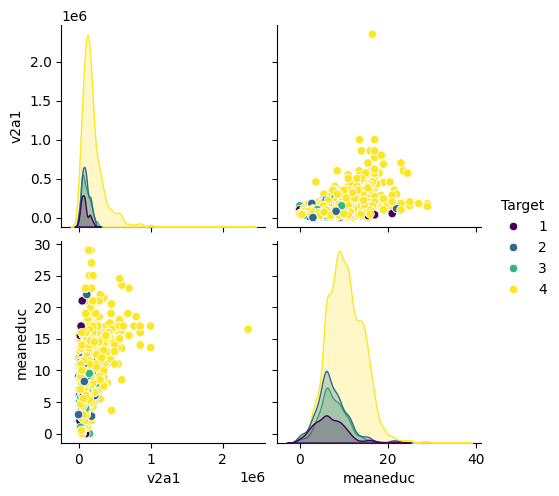

In [107]:
sns.pairplot(
    data[[INCOME_COLUMN_NAME, MEAN_EDUCATION_COLUMN_NAME, CLEAN_DEPENDENCY_COLUMN_NAME, TARGET_COLUMN_NAME]],
    hue=TARGET_COLUMN_NAME,
    palette="viridis"
)
plt.show()

## Fase de modelado

In [11]:

columns_to_check = ["rooms", "r4h1", "r4h2", "r4h3", "r4m1", "r4m2", "r4m3"]

X_indirect = data[columns_to_check]
y_indirect = data["Target"]

X_train_indirect, X_val_indirect, y_train_indirect, y_val_indirect = train_test_split(X_indirect, y_indirect, test_size=0.2, random_state=42)


model = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_indirect, y_train_indirect)

y_pred_indirect = best_model.predict(X_val_indirect)

print(f"Accuracy: {accuracy_score(y_val_indirect, y_pred_indirect)}")

Mejores parámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.7207112970711297


In [18]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_indirect, y_train_indirect)

y_pred_rf_indirect = best_rf_model.predict(X_val_indirect)
print(f"Random Forest Accuracy (after tuning): {accuracy_score(y_val_indirect, y_pred_rf_indirect)}")

/Users/esteban/Documents/TC03ML/TCvenv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy (after tuning): 0.7107740585774058


In [4]:
columns_to_check = ["r4h1", "r4h2", "r4h3", "r4m1", "r4m2", "r4m3"]

X_indirect = data[columns_to_check]
y_indirect = data["Target"]

X_train_indirect, X_val_indirect, y_train_indirect, y_val_indirect = train_test_split(X_indirect, y_indirect, test_size=0.2, random_state=42)


model = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_indirect, y_train_indirect)

y_pred_indirect = best_model.predict(X_val_indirect)

print(f"Accuracy: {accuracy_score(y_val_indirect, y_pred_indirect)}")

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_indirect, y_train_indirect)

y_pred_rf_indirect = best_rf_model.predict(X_val_indirect)
print(f"Random Forest Accuracy (after tuning): {accuracy_score(y_val_indirect, y_pred_rf_indirect)}")

Mejores parámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.6710251046025104


/Users/esteban/Documents/TC03ML/TCvenv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy (after tuning): 0.6689330543933054


In [5]:
columns_to_check = [ "r4h3", "r4m3"]

X_indirect = data[columns_to_check]
y_indirect = data["Target"]

X_train_indirect, X_val_indirect, y_train_indirect, y_val_indirect = train_test_split(X_indirect, y_indirect, test_size=0.2, random_state=42)


model = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_indirect, y_train_indirect)

y_pred_indirect = best_model.predict(X_val_indirect)

print(f"Accuracy: {accuracy_score(y_val_indirect, y_pred_indirect)}")

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_indirect, y_train_indirect)

y_pred_rf_indirect = best_rf_model.predict(X_val_indirect)
print(f"Random Forest Accuracy (after tuning): {accuracy_score(y_val_indirect, y_pred_rf_indirect)}")

Mejores parámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.6255230125523012


/Users/esteban/Documents/TC03ML/TCvenv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy (after tuning): 0.6255230125523012


In [6]:
columns_to_check = [ "r4h3", "r4m3", "rooms"]

X_indirect = data[columns_to_check]
y_indirect = data["Target"]

X_train_indirect, X_val_indirect, y_train_indirect, y_val_indirect = train_test_split(X_indirect, y_indirect, test_size=0.2, random_state=42)


model = SVC()
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_indirect, y_train_indirect)

y_pred_indirect = best_model.predict(X_val_indirect)

print(f"Accuracy: {accuracy_score(y_val_indirect, y_pred_indirect)}")

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_indirect, y_train_indirect)

print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_indirect, y_train_indirect)

y_pred_rf_indirect = best_rf_model.predict(X_val_indirect)
print(f"Random Forest Accuracy (after tuning): {accuracy_score(y_val_indirect, y_pred_rf_indirect)}")

Mejores parámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.6600418410041841


/Users/esteban/Documents/TC03ML/TCvenv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy (after tuning): 0.6631799163179917
